# Test Results

In [1]:
import numpy as np
from SMA import BaseSMA, OriginalSMA
import LocMinFuncs
import plot
from GWO import GreyWolf

#to modify starting point, update 'pos' in path() func call
def path(obj_func, lb, ub, problem_size, verbose, epoch, pop_size,pos = np.array([-6,6]), Alg="SMA"):
    p=[]
    p.append(pos)
    resolution = 5
    #resolution = 20
    bnd = np.array([ub,lb]) #bounds
    iters = 0
    while True:
        if (p[-1][0] < 95) and (p[-1][0] > 85) and (p[-1][1] < 90) and (p[-1][1] > 75):
            break
    #for i in range(10): #number of steps to take
        #print("****** i *****:", i)
        # regional area size
        #m_ub = list((bnd/resolution + pos)[0])
        m_ub = list(pos+100)
        m_lb = list(pos-100)
        #previous working line
        #m_lb = list((bnd/resolution + pos)[1])
        
        #for j in range(0,2):
        #m_ub.append(ub[j]/resolution + pos[j])
        #m_lb.append(lb[j]/resolution + pos[j])
        # print(m_ub,"\n",m_lb,"\n")
        if Alg == "SMA":
            md1 = BaseSMA(obj_func, m_lb, m_ub, problem_size, verbose, epoch, pop_size)
            best_pos1, best_fit1, list_loss1, time_elapsed1, iters_ran  = md1.train()
            pos = md1.solution[0]
            p.append(pos)
            iters = iters + iters_ran
        if Alg == "GWO":
            md3 = GreyWolf(obj_func, m_lb, m_ub, problem_size, verbose, epoch, pop_size)
            best_pos3, best_fit3, list_loss3, time_elapsed3, iters_ran = md3.train()
            pos = md3.solution[0]
            p.append(pos)
            iters = iters + iters_ran
    p = np.array(p)
    print("Path iterations ran:", iters)
    return p

Initialization:

In [2]:
#Ackley
ub = [0,1000]
lb = [0,1000]
problem_size = 2

## Setting parameters
obj_func = LocMinFuncs.some_obstacles
#obj_func = LocMinFuncs.ackley
pos = np.array([900,900]) #starting position
verbose = False
epoch = 50
pop_size = 50

## SMA:

Path iterations ran: 17
Global Best Solution:
[   0. 1000.]
<class 'numpy.ndarray'>
[[ 900.          900.        ]
 [1000.          800.        ]
 [ 900.          700.        ]
 [ 800.          600.        ]
 [ 700.          500.        ]
 [ 600.          400.        ]
 [ 500.          300.        ]
 [ 400.          200.        ]
 [ 300.          100.        ]
 [ 200.           79.00176792]
 [ 100.           77.504884  ]
 [  88.47143378   70.53951426]
 [  92.79311848   79.69992586]]
Total Distance: 1711.986517256825
Original SMA Best Fit: 465.12418300653593
SMA Time Elapsed:  0.30120920400000006


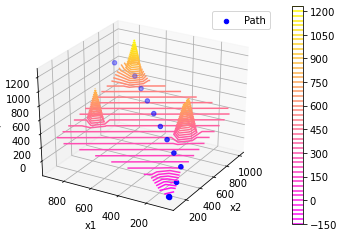

In [3]:
md1 = BaseSMA(obj_func, lb, ub, problem_size, verbose, epoch, pop_size)
best_pos1, best_fit1, list_loss1, time_elapsed1, iters_ran = md1.train()
# return : the global best solution, the fitness of global best solution and the loss of training process in each epoch/iteration
p = path(obj_func, lb, ub, problem_size, verbose, epoch, pop_size,pos,"SMA")
dist = plot.plot(p[:,0],p[:,1],obj_func)
print('Global Best Solution:')
print(md1.solution[0])
print(type(md1.solution[0]))
print(p)

print("Total Distance:",dist)
print("Original SMA Best Fit:", best_fit1)
print("SMA Time Elapsed: ", time_elapsed1)

## GWO:

In [ ]:
md3 = GreyWolf(obj_func, lb, ub, problem_size, verbose, epoch, pop_size)
best_pos3, best_fit3, list_loss3, time_elapsed3, iters_ran = md3.train()
# return : the global best solution, the fitness of global best solution and the loss of training process in each epoch/iteration
p = path(obj_func, lb, ub, problem_size, verbose, epoch, pop_size,pos,"GWO")
dist = plot.plot(p[:,0],p[:,1],obj_func)
print('Global Best Solution:')
print(md3.solution[0])
print(type(md3.solution[0]))
print(p)
print("Total Distance:",dist)
print("GWO Best Fit:", best_fit3)
print("GWO Time Elapsed: ", time_elapsed3)